In [152]:
import pandas as pd
import numpy as np
from tqdm import tqdm
#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  # natural language processing
nltk.download("stopwords")
nltk.downloader.download('vader_lexicon')
from nltk.corpus import stopwords

from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# rotulando name
from sklearn.feature_extraction.text import CountVectorizer
import sklearn

pd.options.plotting.backend = "plotly"


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joelm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\joelm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Load Tweet dataset
dataset price bitcoin: https://www.investing.com/crypto/bitcoin/historical-data
dataset twitter: https://www.kaggle.com/datasets/kaushiksuresh147/bitcoin-tweets

In [153]:
# Formas de limpeza dos twitter
# https://www.kaggle.com/code/offmann/bitcoin-tweets-dataviz-transformers-sentiment-an

""" Atributos da base de twitters
1	  user_name	The name of the user, as they’ve defined it.
2	  user_location	The user-defined location for this account’s profile.
3	  user_description	The user-defined UTF-8 string describing their account.
4	  user_created	Time and date, when the account was created.
5	  user_followers	The number of followers an account currently has.
6	  user_friends	The number of friends an account currently has.
7	  user_favourites	The number of favorites an account currently has
8	  user_verified	When true, indicates that the user has a verified account
9	  date	UTC time and date when the Tweet was created
10	text	The actual UTF-8 text of the Tweet
11	hashtags	All the other hashtags posted in the tweet along with #Bitcoin & #btc
12	source	Utility used to post the Tweet, Tweets from the Twitter website have a source value - web
13	is_retweet	Indicates whether this Tweet has been Retweeted by the authenticating user. """

""" Atributos base 03 - bitcoin info
Data: Data em que as métricas foram registradas. (Date)
Contagem de Endereços Ativos: Número de endereços únicos que realizaram transações na rede. (AdrActCnt)
Contagem de Endereços com Saldo de 100 mil ou mais: Número de endereços com saldo de 100 mil ou mais unidades da criptomoeda. (AdrBal1in100KCnt)
Contagem de Endereços com Saldo de 100 milhões ou mais: Número de endereços com saldo de 100 milhões ou mais unidades da criptomoeda. (AdrBal1in100MCnt)
Contagem de Endereços com Saldo de 10 bilhões ou mais: Número de endereços com saldo de 10 bilhões ou mais unidades da criptomoeda. (AdrBal1in10BCnt)
Contagem de Endereços com Saldo de 10 mil ou mais: Número de endereços com saldo de 10 mil ou mais unidades da criptomoeda. (AdrBal1in10KCnt)
Contagem de Endereços com Saldo de 10 milhões ou mais: Número de endereços com saldo de 10 milhões ou mais unidades da criptomoeda. (AdrBal1in10MCnt)
Contagem de Endereços com Saldo de 1 bilhão ou mais: Número de endereços com saldo de 1 bilhão ou mais unidades da criptomoeda. (AdrBal1in1BCnt)
Contagem de Endereços com Saldo de 1 mil ou mais: Número de endereços com saldo de 1 mil ou mais unidades da criptomoeda. (AdrBal1in1KCnt)
Contagem de Endereços com Saldo de 1 milhão ou mais: Número de endereços com saldo de 1 milhão ou mais unidades da criptomoeda. (AdrBal1in1MCnt)
Contagem de Endereços com Saldo: Número total de endereços com saldo de qualquer valor. (AdrBalCnt)
Contagem de Endereços com Saldo Nativo de 0.001 ou mais: Número de endereços com saldo nativo de 0.001 ou mais unidades da criptomoeda. (AdrBalNtv0.001Cnt)
Contagem de Endereços com Saldo Nativo de 0.01 ou mais: Número de endereços com saldo nativo de 0.01 ou mais unidades da criptomoeda. (AdrBalNtv0.01Cnt)
Contagem de Endereços com Saldo Nativo de 0.1 ou mais: Número de endereços com saldo nativo de 0.1 ou mais unidades da criptomoeda. (AdrBalNtv0.1Cnt)
Contagem de Endereços com Saldo Nativo de 100 ou mais: Número de endereços com saldo nativo de 100 ou mais unidades da criptomoeda. (AdrBalNtv100Cnt)
Contagem de Endereços com Saldo Nativo de 100 mil ou mais: Número de endereços com saldo nativo de 100 mil ou mais unidades da criptomoeda. (AdrBalNtv100KCnt)
Contagem de Endereços com Saldo Nativo de 10 ou mais: Número de endereços com saldo nativo de 10 ou mais unidades da criptomoeda. (AdrBalNtv10Cnt)
Contagem de Endereços com Saldo Nativo de 10 mil ou mais: Número de endereços com saldo nativo de 10 mil ou mais unidades da criptomoeda. (AdrBalNtv10KCnt)
Contagem de Endereços com Saldo Nativo de 1 ou mais: Número de endereços com saldo nativo de 1 ou mais unidades da criptomoeda. (AdrBalNtv1Cnt)
Contagem de Endereços com Saldo Nativo de 1 mil ou mais: Número de endereços com saldo nativo de 1 mil ou mais unidades da criptomoeda. (AdrBalNtv1KCnt)
Contagem de Endereços com Saldo Nativo de 1 milhão ou mais: Número de endereços com saldo nativo de 1 milhão ou mais unidades da criptomoeda. (AdrBalNtv1MCnt)
Contagem de Endereços com Saldo em USD de 100 ou mais: Número de endereços com saldo em USD de 100 ou mais unidades. (AdrBalUSD100Cnt)
Contagem de Endereços com Saldo em USD de 100 mil ou mais: Número de endereços com saldo em USD de 100 mil ou mais unidades. (AdrBalUSD100KCnt)
Contagem de Endereços com Saldo em USD de 10 ou mais: Número de endereços com saldo em USD de 10 ou mais unidades. (AdrBalUSD10Cnt)
Contagem de Endereços com Saldo em USD de 10 mil ou mais: Número de endereços com saldo em USD de 10 mil ou mais unidades. (AdrBalUSD10KCnt)
Contagem de Endereços com Saldo em USD de 10 milhões ou mais: Número de endereços com saldo em USD de 10 milhões ou mais unidades. (AdrBalUSD10MCnt)
Contagem de Endereços com Saldo em USD de 1 ou mais: Número de endereços com saldo em USD de 1 ou mais unidades. (AdrBalUSD1Cnt)
Contagem de Endereços com Saldo em USD de 1 mil ou mais: Número de endereços com saldo em USD de 1 mil ou mais unidades. (AdrBalUSD1KCnt)
Contagem de Endereços com Saldo em USD de 1 milhão ou mais: Número de endereços com saldo em USD de 1 milhão ou mais unidades. (AdrBalUSD1MCnt)
Tempo de conclusão do Ativo no Fim do Dia do Ativo: Horário de conclusão do ativo no fim do dia. (AssetEODCompletionTime)
Contagem de Blocos: Número total de blocos na blockchain. (BlkCnt)
Tamanho Médio do Bloco em Bytes: Tamanho médio dos blocos em bytes. (BlkSizeMeanByte)
Peso Médio do Bloco: Peso médio dos blocos. (BlkWghtMean)
Peso Total do Bloco: Peso total dos blocos. (BlkWghtTot)
Atividade de Capitalização em USD no Último Ano: Atividade de capitalização em USD no último ano. (CapAct1yrUSD)
Valor Realizado de Mercado Atual: Valor de mercado realizado atual. (CapMVRVCur)
Valor Realizado de Mercado para Valor de Mercado Futuro: Valor de mercado realizado para valor de mercado futuro. (CapMVRVFF)
Valor de Mercado Atual em USD: Valor de mercado atual em USD. (CapMrktCurUSD)
Valor de Mercado Futuro em USD: Valor de mercado futuro em USD. (CapMrktFFUSD)
Valor Realizado em USD: Valor realizado em USD. (CapRealUSD)
Dificuldade do Último Bloco: Dificuldade do último bloco. (DiffLast)
Dificuldade Média: Dificuldade média. (DiffMean)
Taxa Média de Taxa por Byte Nativa: Taxa média de taxa por byte nativa. (FeeByteMeanNtv)
Taxa Média de Taxa: Taxa média de taxa. (FeeMeanNtv)
Taxa Média em USD: Taxa média em USD. (FeeMeanUSD)
Taxa Mediana Nativa: Taxa mediana nativa. (FeeMedNtv)
Taxa Mediana em USD: Taxa mediana em USD. (FeeMedUSD)
Taxa Total Nativa: Taxa total nativa. (FeeTotNtv)
Taxa Total em USD: Taxa total em USD. (FeeTotUSD)
Fluxo de Entrada de Trocas em Unidades Nativas: Fluxo de entrada de trocas em unidades nativas. (FlowInExNtv)
Fluxo de Entrada de Trocas em USD: Fluxo de entrada de trocas em USD. (FlowInExUSD)
Fluxo de Saída de Trocas em Unidades Nativas: Fluxo de saída de trocas em unidades nativas. (FlowOutExNtv)
Fluxo de Saída de Trocas em USD: Fluxo de saída de trocas em USD. (FlowOutExUSD)
Contagem de Transferências de Troca: Número de transferências de troca. (FlowTfrFromExCnt)
Taxa de Hash: Taxa de hash. (HashRate)
Taxa de Hash dos Últimos 30 Dias: Taxa de hash dos últimos 30 dias. (HashRate30d)
Contagem de Contratos Emitidos em Unidades Nativas: Número de contratos emitidos em unidades nativas. (IssContNtv)
Percentual de Contratos Emitidos Anualmente: Percentual de contratos emitidos anualmente. (IssContPctAnn)
Percentual de Contratos Emitidos Diariamente: Percentual de contratos emitidos diariamente. (IssContPctDay)
Valor de Contratos Emitidos em USD: Valor de contratos emitidos em USD. (IssContUSD)
Total Emitido em Unidades Nativas: Total emitido em unidades nativas. (IssTotNtv)
Total Emitido em USD: Total emitido em USD. (IssTotUSD)
Data da Prova de Trabalho: Data da prova de trabalho. (NDF)
NVT Ajustado: NVT ajustado. (NVTAdj)
NVT Ajustado em 90 Dias: NVT ajustado em 90 dias. (NVTAdj90)
NVT Ajustado Futuro: NVT ajustado futuro. (NVTAdjFF)
NVT Ajustado Futuro em 90 Dias: NVT ajustado futuro em 90 dias. (NVTAdjFF90)
Preço em BTC: Preço em BTC. (PriceBTC)
Preço em USD: Preço em USD. (PriceUSD)
ROI de 1 Ano: ROI de 1 ano. (ROI1yr)
ROI de 30 Dias: ROI de 30 dias. (ROI30d)
Receita Total em USD de Todos os Tempos: Receita total em USD de todos os tempos. (RevAllTimeUSD)
Receita de Hash em Unidades Nativas: Receita de hash em unidades nativas. (RevHashNtv)
Taxa de Receita de Hash: Taxa de receita de hash. (RevHashRateNtv)
Taxa de Receita de Hash em USD: Taxa de receita de hash em USD. (RevHashRateUSD)
Receita de Hash em USD: Receita de hash em USD. (RevHashUSD)
Receita em Unidades Nativas: Receita em unidades nativas. (RevNtv)
Receita em USD: Receita em USD. (RevUSD)
Relação de Estoque-Fluxo: Relação de estoque-fluxo. (SER)
Atividade de Suprimento em 10 Anos: Atividade de suprimento em 10 anos. (SplyAct10yr)
Atividade de Suprimento em 180 Dias: Atividade de suprimento em 180 dias. (SplyAct180d)
Atividade de Suprimento em 1 Dia: Atividade de suprimento em 1 dia. (SplyAct1d)
Atividade de Suprimento em 1 Ano: Atividade de suprimento em 1 ano. (SplyAct1yr)
Atividade de Suprimento em 2 Anos: Atividade de suprimento em 2 anos. (SplyAct2yr)
Atividade de Suprimento em 30 Dias: Atividade de suprimento em 30 dias. (SplyAct30d)
Atividade de Suprimento em 3 Anos: Atividade de suprimento em 3 anos. (SplyAct3yr)
Atividade de Suprimento em 4 Anos: Atividade de suprimento em 4 anos. (SplyAct4yr)
Atividade de Suprimento em 5 Anos: Atividade de suprimento em 5 anos. (SplyAct5yr)
Atividade de Suprimento em 7 Dias: Atividade de suprimento em 7 dias. (SplyAct7d)
Atividade de Suprimento em 90 Dias: Atividade de suprimento em 90 dias. (SplyAct90d)
Atividade de Suprimento de Todos os Tempos: Atividade de suprimento de todos os tempos. (SplyActEver)
Percentual de Suprimento de Atividade em 1 Ano: Percentual de suprimento de atividade em 1 ano. (SplyActPct1yr)
Suprimento de Endereço com Saldo de 100 mil ou mais: Suprimento de endereço com saldo de 100 mil ou mais. (SplyAdrBal1in100K)
Suprimento de Endereço com Saldo de 100 milhões ou mais: Suprimento de endereço com saldo de 100 milhões ou mais. (SplyAdrBal1in100M)
Suprimento de Endereço com Saldo de 10 bilhões ou mais: Suprimento de endereço com saldo de 10 bilhões ou mais. (SplyAdrBal1in10B)
Suprimento de Endereço com Saldo de 10 mil ou mais: Suprimento de endereço com saldo de 10 mil ou mais. (SplyAdrBal1in10K)
Suprimento de Endereço com Saldo de 10 milhões ou mais: Suprimento de endereço com saldo de 10 milhões ou mais. (SplyAdrBal1in10M)
Suprimento de Endereço com Saldo de 1 bilhão ou mais: Suprimento de endereço com saldo de 1 bilhão ou mais. (SplyAdrBal1in1B)
Suprimento de Endereço com Saldo de 1 mil ou mais: Suprimento de endereço com saldo de 1 mil ou mais. (SplyAdrBal1in1K)
Suprimento de Endereço com Saldo de 1 milhão ou mais: Suprimento de endereço com saldo de 1 milhão ou mais. (SplyAdrBal1in1M)
Suprimento de Endereço com Saldo Nativo de 0.001 ou mais: Suprimento de endereço com saldo nativo de 0.001 ou mais. (SplyAdrBalNtv0.001)
Suprimento de Endereço com Saldo Nativo de 0.01 ou mais: Suprimento de endereço com saldo nativo de 0.01 ou mais. (SplyAdrBalNtv0.01)
Suprimento de Endereço com Saldo Nativo de 0.1 ou mais: Suprimento de endereço com saldo nativo de 0.1 ou mais. (SplyAdrBalNtv0.1)
Suprimento de Endereço com Saldo Nativo de 1 ou mais: Suprimento de endereço com saldo nativo de 1 ou mais. (SplyAdrBalNtv1)
Suprimento de Endereço com Saldo Nativo de 10 ou mais: Suprimento de endereço com saldo nativo de 10 ou mais. (SplyAdrBalNtv10)
Suprimento de Endereço com Saldo Nativo de 100 ou mais: Suprimento de endereço com saldo nativo de 100 ou mais. (SplyAdrBalNtv100)
Suprimento de Endereço com Saldo Nativo de 100 mil ou mais: Suprimento de endereço com saldo nativo de 100 mil ou mais. (SplyAdrBalNtv100K)
Suprimento de Endereço com Saldo Nativo de 10 mil ou mais: Suprimento de endereço com saldo nativo de 10 mil ou mais. (SplyAdrBalNtv10K)
Suprimento de Endereço com Saldo Nativo de 1 mil ou mais: Suprimento de endereço com saldo nativo de 1 mil ou mais. (SplyAdrBalNtv1K)
Suprimento de Endereço com Saldo Nativo de 1 milhão ou mais: Suprimento de endereço com saldo nativo de 1 milhão ou mais. (SplyAdrBalNtv1M)
Suprimento de Endereço com Saldo em USD de 1 ou mais: Suprimento de endereço com saldo em USD de 1 ou mais. (SplyAdrBalUSD1)
Suprimento de Endereço com Saldo em USD de 10 ou mais: Suprimento de endereço com saldo em USD de 10 ou mais. (SplyAdrBalUSD10)
Suprimento de Endereço com Saldo em USD de 100 ou mais: Suprimento de endereço com saldo em USD de 100 ou mais. (SplyAdrBalUSD100)
Suprimento de Endereço com Saldo em USD de 100 mil ou mais: Suprimento de endereço com saldo em USD de 100 mil ou mais. (SplyAdrBalUSD100K)
Suprimento de Endereço com Saldo em USD de 10 mil ou mais: Suprimento de endereço com saldo em USD de 10 mil ou mais. (SplyAdrBalUSD10K)
Suprimento de Endereço com Saldo em USD de 10 milhões ou mais: Suprimento de endereço com saldo em USD de 10 milhões ou mais. (SplyAdrBalUSD10M)
Suprimento de Endereço com Saldo em USD de 1 mil ou mais: Suprimento de endereço com saldo em USD de 1 mil ou mais. (SplyAdrBalUSD1K)
Suprimento de Endereço com Saldo em USD de 1 milhão ou mais: Suprimento de endereço com saldo em USD de 1 milhão ou mais. (SplyAdrBalUSD1M)
Suprimento dos 100 Principais Endereços: Suprimento dos 100 principais endereços. (SplyAdrTop100)
Percentual de Suprimento Detido pelos 10% dos Principais Endereços: Percentual de suprimento detido pelos 10% dos principais endereços. (SplyAdrTop10Pct)
Percentual de Suprimento Detido pelos 1% dos Principais Endereços: Percentual de suprimento detido pelos 1% dos principais endereços. (SplyAdrTop1Pct)
Suprimento Circulante: Suprimento circulante. (SplyCur)
Suprimento Futuro Esperado em 10 Anos: Suprimento futuro esperado em 10 anos. (SplyExpFut10yr)
Suprimento em Circulação Excluindo Endereços de Troca: Suprimento em circulação excluindo endereços de troca. (SplyFF)
Suprimento Mínimo de Todos os Mineradores sem Saltos em Unidades Nativas: Suprimento mínimo de todos os mineradores sem saltos em unidades nativas. (SplyMiner0HopAllNtv)
Suprimento Mínimo de Todos os Mineradores sem Saltos em USD: Suprimento mínimo de todos os mineradores sem saltos em USD. (SplyMiner0HopAllUSD)
Suprimento Mínimo de Todos os Mineradores com 1 Salto em Unidades Nativas: Suprimento mínimo de todos os mineradores com 1 salto em unidades nativas. (SplyMiner1HopAllNtv)
Suprimento Mínimo de Todos os Mineradores com 1 Salto em USD: Suprimento mínimo de todos os mineradores com 1 salto em USD. (SplyMiner1HopAllUSD)
Contagem de Transações: Número total de transações na blockchain. (TxCnt)
Contagem de Transações por Segundo: Número total de transações por segundo. (TxCntSec)
Contagem de Transferências: Número total de transferências na blockchain. (TxTfrCnt)
Valor de Transferência Ajustado em Unidades Nativas: Valor de transferência ajustado em unidades nativas. (TxTfrValAdjNtv)
Valor de Transferência Ajustado em USD: Valor de transferência ajustado em USD. (TxTfrValAdjUSD)
Valor Médio de Transferência em Unidades Nativas: Valor médio de transferência em unidades nativas. (TxTfrValMeanNtv)
Valor Médio de Transferência em USD: Valor médio de transferência em USD. (TxTfrValMeanUSD)
Valor Mediano de Transferência em Unidades Nativas: Valor mediano de transferência em unidades nativas. (TxTfrValMedNtv)
Valor Mediano de Transferência em USD: Valor mediano de transferência em USD. (TxTfrValMedUSD)
Velocidade de Circulação em 1 Ano: Velocidade de circulação em 1 ano. (VelCur1yr)
Retorno Diário de Volatilidade em 180 Dias: Retorno diário de volatilidade em 180 dias. (VtyDayRet180d)
Retorno Diário de Volatilidade em 30 Dias: Retorno diário de volatilidade em 30 dias. (VtyDayRet30d)
"""

# Limpeza e pre processamento
# https://www.kaggle.com/code/jeanho/btc-project-eda

import sklearn.preprocessing


pd.set_option('display.max_rows', None)

# Load Tweet dataset
df1 = pd.read_csv('../data/raw/Bitcoin_tweets.csv', nrows=10)
df2 = pd.read_csv('../data/raw/BitcoinPriceHistory.csv')
df3 = pd.read_csv('../data/raw/bitcoin_info.csv', sep=';')


""" ['date'] == "['ETH', 'BTC', 'Bitcoin']"
# df1 = df1.drop(df1.index[64943])
# df1=df1.drop(df1.index[137067])
# df1=df1.drop(df1.index[180573])
# df1=df1.drop(df1.index[693191])
# df1=df1.drop(df1.index[697393]) """

df1['date'] = pd.to_datetime(df1['date'])
df1['date'] = df1['date'].dt.tz_localize('UTC').dt.strftime('%m-%d-%Y')

df2['Date'] = pd.to_datetime(df2['Date'], format='%m/%d/%Y')
df2['Date'] = df2['Date'].dt.tz_localize('UTC').dt.strftime('%m-%d-%Y')

df3['Date'] = pd.to_datetime(df3['Date'], format="%Y-%m-%d")
df3['Date'] = df3['Date'].dt.tz_localize('UTC').dt.strftime('%m-%d-%Y')

# atributos da base 02
df1['price'] = df1['date'].map(df2.set_index('Date')['Price'])

# atributos da base 03
df1['address_active_count'] = df1['date'].map(
    df3.set_index('Date')['AdrActCnt'])
df1['total_transf_blockchain'] = df1['date'].map(
    df3.set_index('Date')['TxTfrCnt'])
df1['total_transaction_blockchain'] = df1['date'].map(
    df3.set_index('Date')['TxCnt'])
df1['suplay_currency_currently'] = df1['date'].map(
    df3.set_index('Date')['SplyCur'])
df1['revenue_usd'] = df1['date'].map(df3.set_index('Date')['RevUSD'])
df1['roi_30d'] = df1['date'].map(df3.set_index('Date')['ROI30d'])
df1['value_future_mkt_usd'] = df1['date'].map(
    df3.set_index('Date')['CapMrktFFUSD'])
df1['value_current_mkt_usd'] = df1['date'].map(
    df3.set_index('Date')['CapMrktCurUSD'])

# remoção das linhas com dados faltantes
df1.dropna(axis=0, inplace=True)

df1 = df1.assign(**{
    'first_name': df1['user_name'].str.split().str[0],
    'middle_name': df1['user_name'].str.split().str[1:-1].str.join(' '),
    'last_name': df1['user_name'].str.split().str[-1]
})
df1 = df1.assign(**{
    'city': df1['user_location'].str.split().str[0],
    'country': df1['user_location'].str.split().str[-1],
})

""" # Initialize and fit CountVectorizer with given text documents
vectorizer = CountVectorizer().fit(df1['user_name'])

# use the vectorizer to transform the document into word count vectors (Sparse)
word_mat = vectorizer.transform(df1['user_name']) """
""" from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(user_location = [0])
df = onehotencoder.fit_transform(df1).toarray() """

df = df1[[
    # atributos da base 01
    'first_name', 'last_name', 'city', 'country', 'text',  'date',
    'user_followers', 'user_friends',
    # atributos da base 02
    'price',
    # atributos da base 03
    'address_active_count', 'roi_30d', 'total_transaction_blockchain',
    'suplay_currency_currently', 'revenue_usd', 'total_transf_blockchain',
    'value_future_mkt_usd', 'value_current_mkt_usd']][:100]
df


,first_name,last_name,city,country,text,date,user_followers,user_friends,price,address_active_count,roi_30d,total_transaction_blockchain,suplay_currency_currently,revenue_usd,total_transf_blockchain,value_future_mkt_usd,value_current_mkt_usd
0,DeSota,Wilson,"Atlanta,",GA,Blue Ridge Bank shares halted by NYSE after #b...,02-10-2021,8534.0,7605,"44,836.0",1191329,27.810462,340736,18625227,4.795772e+07,1030557,6.558741e+11,8.395904e+11
4,Alex,#FactsSuperspreader,Europa,Europa,This network is secured by 9 508 nodes as of t...,02-10-2021,1249.0,1472,"44,836.0",1191329,27.810462,340736,18625227,4.795772e+07,1030557,6.558741e+11,8.395904e+11
5,ZerrBenz™,20732,"Bkk,",Thailand,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,02-10-2021,742.0,716,"44,836.0",1191329,27.810462,340736,18625227,4.795772e+07,1030557,6.558741e+11,8.395904e+11
6,Bitcoin-Bot,Bitcoin-Bot,"Florida,",USA,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,02-10-2021,131.0,84,"44,836.0",1191329,27.810462,340736,18625227,4.795772e+07,1030557,6.558741e+11,8.395904e+11
9,DeSota,Wilson,"Atlanta,",GA,.@Tesla’s #bitcoin investment is revolutionary...,02-10-2021,8534.0,7605,"44,836.0",1191329,27.810462,340736,18625227,4.795772e+07,1030557,6.558741e+11,8.395904e+11


In [154]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

In [155]:
cleantext=[]
for item in tqdm(df['text']):
    words=tweet_to_words(item)
    cleantext+=[words]
df['cleantext']=cleantext
df

100%|██████████| 5/5 [00:00<00:00, 282.84it/s]


,first_name,last_name,city,country,text,date,user_followers,user_friends,price,address_active_count,roi_30d,total_transaction_blockchain,suplay_currency_currently,revenue_usd,total_transf_blockchain,value_future_mkt_usd,value_current_mkt_usd,cleantext
0,DeSota,Wilson,"Atlanta,",GA,Blue Ridge Bank shares halted by NYSE after #b...,02-10-2021,8534.0,7605,"44,836.0",1191329,27.810462,340736,18625227,4.795772e+07,1030557,6.558741e+11,8.395904e+11,"[blue, ridg, bank, share, halt, nyse, bitcoin,..."
4,Alex,#FactsSuperspreader,Europa,Europa,This network is secured by 9 508 nodes as of t...,02-10-2021,1249.0,1472,"44,836.0",1191329,27.810462,340736,18625227,4.795772e+07,1030557,6.558741e+11,8.395904e+11,"[network, secur, 9, 508, node, today, soon, bi..."
5,ZerrBenz™,20732,"Bkk,",Thailand,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,02-10-2021,742.0,716,"44,836.0",1191329,27.810462,340736,18625227,4.795772e+07,1030557,6.558741e+11,8.395904e+11,"[trade, crypto, binanc, enjoy, cashback, 10, t..."
6,Bitcoin-Bot,Bitcoin-Bot,"Florida,",USA,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,02-10-2021,131.0,84,"44,836.0",1191329,27.810462,340736,18625227,4.795772e+07,1030557,6.558741e+11,8.395904e+11,"[lt, fire, amp, man, gt, bitcoin, crypto, btc,..."
9,DeSota,Wilson,"Atlanta,",GA,.@Tesla’s #bitcoin investment is revolutionary...,02-10-2021,8534.0,7605,"44,836.0",1191329,27.810462,340736,18625227,4.795772e+07,1030557,6.558741e+11,8.395904e+11,"[tesla, bitcoin, invest, revolutionari, crypto..."


In [156]:
def unlist(list):
    return ''.join(f'{item} ' for item in list)

In [157]:
class SentimentAnalyzer:
    def __init__(self):
        self.sentiment_detector = SentimentIntensityAnalyzer()

    def analyze_sentiment(self, text):
        sentiment_scores = self.sentiment_detector.polarity_scores(text)
        if sentiment_scores['compound'] >= 0.05:
            sentiment_scores['sentiment'] = 'Positive'
        elif -0.05 < sentiment_scores['compound'] < 0.05:
            sentiment_scores['sentiment'] = 'Neutral'
        else:
            sentiment_scores['sentiment'] = 'Negative'
        return sentiment_scores

In [158]:
def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    analyzer = SentimentAnalyzer()
    
    df["negative"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neg"])
    df["neutral"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neu"])
    df["positive"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["pos"])
    df["compound"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["compound"])
    df['cleantext2'] = df[label].apply(lambda x: unlist(x))
    df['sentiment'] = df[label].apply(lambda x: analyzer.analyze_sentiment(unlist(x))["sentiment"])
    return df

In [159]:
# remover compound
# K-NN  utlizar para verificar o desempenho do modelo
# Analisar o uso do campo de data (Ano, mes, estação do ano) para encontrar alguma influência no preço do BTC - campo date
# quantidade de seguidores que podem ter sido impactados ao verem a postagem - campo user_followers
df = compute_vader_scores(df,'cleantext')
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df[['user_name', 'user_location', 'text', 'price', 'date',
    'user_followers', 'user_friends', 'address_active_count',  'roi_30d',
    'total_transaction_blockchain', 'suplay_currency_currently', 'revenue_usd',
    'total_transf_blockchain', 'value_future_mkt_usd', 'value_current_mkt_usd',
    'day', 'month', 'year', 'positive', 'negative', 'neutral', 'sentiment']]


KeyError: "['user_name', 'user_location'] not in index"

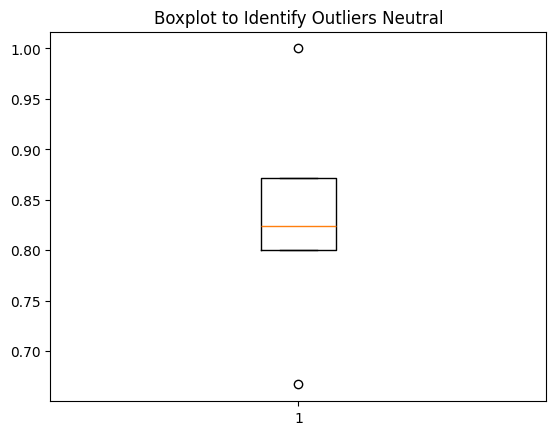

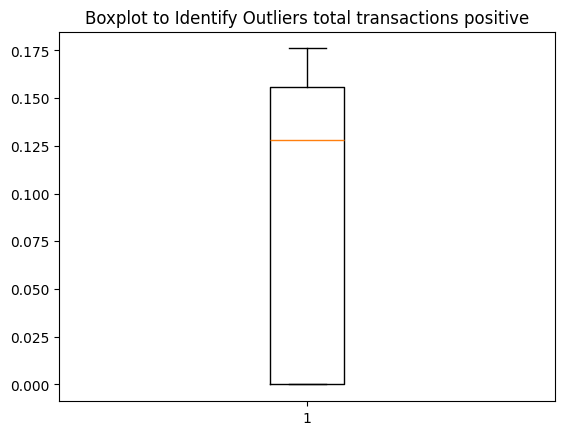

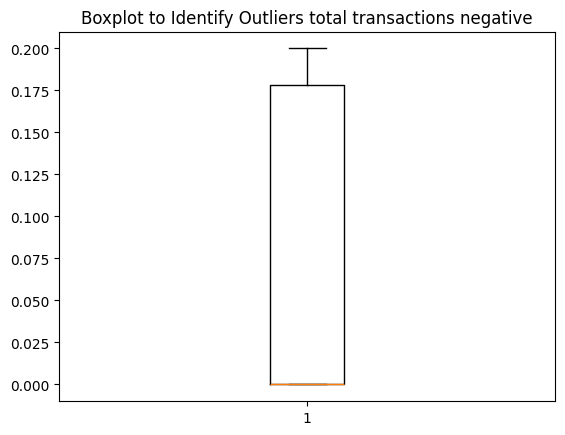

In [ ]:
import matplotlib.pyplot as plt


plt.boxplot(df['neutral'])
plt.title("Boxplot to Identify Outliers Neutral")
plt.show()
plt.boxplot(df['positive'])
plt.title("Boxplot to Identify Outliers total transactions positive")
plt.show()
plt.boxplot(df['negative'])
plt.title("Boxplot to Identify Outliers total transactions negative")
plt.show()

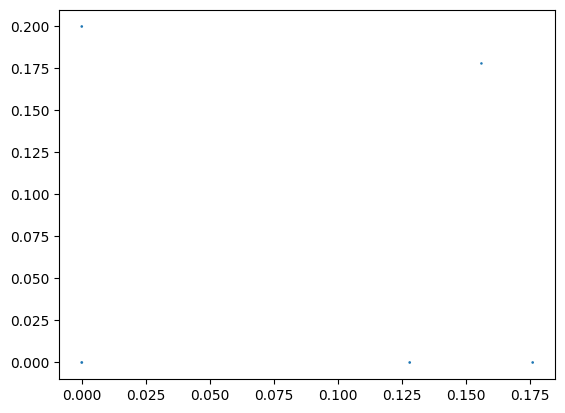

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['positive'], df['negative'], df['neutral'])
#ax.scatter(df['positive'], df['negative'])
#ax.scatter(df['neutral'], df['negative'])

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['positive', 'negative', 'neutral']])
kmeans.labels_

array([0, 1, 0, 1, 2])

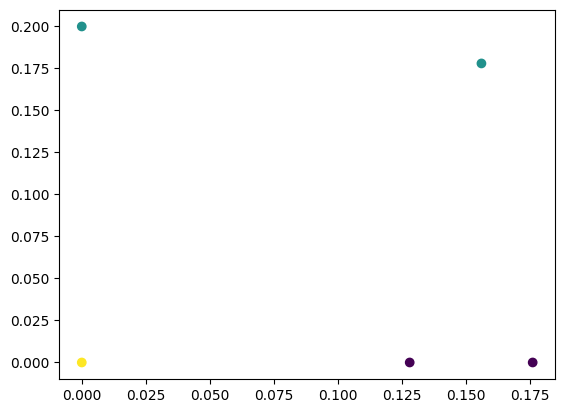

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['positive'], df['negative'], c=kmeans.labels_)